In [1]:
# %history -g
!pwd

/home/maxim/Projects/IR


In [2]:
from platform import python_version

print(python_version())

3.6.9


In [3]:
import sys
print(sys.executable)

/home/maxim/anaconda3/envs/vis_test1/bin/python


# Import

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import ase.io
import ase
import nglview as nv
from ase.visualize import view
from ase_notebook import AseView, ViewConfig, get_example_atoms
from x3dase.visualize import view_x3d_n

def my_plot(files, title, subtitle, atoms_dist, labels, Range=[0,-1], size = (21,8)):
    fig, ax = plt.subplots(3, 2)

    fig.set_size_inches(size)
    fig.suptitle(title, fontsize=22)
    for i in range(0, len(files)):
        f = open(files[i])
        lines = f.readlines()
        f.close()
        r = []
        toten = []
        egap = []
        err = []
        temp = []
        for j in range(0, len(lines)):
            if 'step' in lines[j]:
                a = np.array([float(x) for x in lines[j+1+atoms_dist[0]].split()[1:4] ])
                b = np.array([float(x) for x in lines[j+1+atoms_dist[1]].split()[1:4] ])
                r.append(np.linalg.norm(a-b))
                temp.append(float( lines[j].split()[3][0:-1]))
                toten.append(float(lines[j].split()[5]) + float( lines[j].split()[7]))
                egap.append(float( lines[j].split()[9]))
                err.append(float( lines[j].split()[11]))

        fontsize = 18
        ax[0,0].set_title(subtitle + ' dist, Å', fontsize=fontsize)
        ax[0,0].plot(r[Range[0]:Range[1]], linewidth=3-i, label = labels[i])
        ax[0,0].legend(fontsize = 15, loc=(0.7,1.1))

        ax[0,1].set_title(subtitle + ' total energy, eV', fontsize=fontsize)
        ax[0,1].plot(toten[Range[0]:Range[1]], linewidth=3-i)

        ax[1,0].set_title(subtitle + ' HOMO-LUMO gap, eV', fontsize=fontsize)
        ax[1,0].plot(egap[Range[0]:Range[1]], linewidth=3-i)

        ax[1,1].set_title('Residual', fontsize=fontsize)
        ax[1,1].plot(err[Range[0]:Range[1]],)
        
        ax[2,1].set_title('T, K', fontsize=fontsize)
        ax[2,1].plot(temp[Range[0]:Range[1]],)
        [x.tick_params(axis='x', labelsize=13) for y in ax for x in y]
        [x.tick_params(axis='y', labelsize=13) for y in ax for x in y]

        print(len(toten))
    fig.tight_layout()

def my_plot_di(files, title, subtitle, atoms_ang, labels, Range=[0,-1], size = (21,8)):
    fig, ax = plt.subplots(3, 2)
    fig.set_size_inches(size)
    fig.suptitle(title, fontsize=22)
    for i in range(0, len(files)):
        traj = ase.io.read(files[i], index=':')
        d = []
        for j in range(0, len(traj)):
            d.append(traj[j].get_dihedral(atoms_ang[0],atoms_ang[1],atoms_ang[2],atoms_ang[3]))

        d = np.unwrap(d, discont=180 )
        #d_ = np.unwrap(d, discont=359 )

        f = open(files[i])
        lines = f.readlines()
        f.close()
        toten = []
        egap = []
        err = []
        temp = []
        for j in range(0, len(lines)):
            if 'step' in lines[j]:
                temp.append(float( lines[j].split()[3][0:-1]))
                toten.append(float(lines[j].split()[5]) + float( lines[j].split()[7]))
                egap.append(float( lines[j].split()[9]))
                err.append(float( lines[j].split()[11]))

        fontsize = 18
        ax[0,0].set_title(subtitle + ' dihedral angle, °', fontsize=fontsize)
        ax[0,0].plot(d[Range[0]:Range[1]], linewidth=3-i, label = labels[i])
        #ax[0,0].plot(d_, linewidth=3-i, label = labels[i])

        ax[0,0].legend(fontsize = 15)

        ax[0,1].set_title(subtitle + ' total energy, eV', fontsize=fontsize)
        ax[0,1].plot(toten[Range[0]:Range[1]], linewidth=3-i)

        ax[1,0].set_title(subtitle + ' HOMO-LUMO gap, eV', fontsize=fontsize)
        ax[1,0].plot(egap[Range[0]:Range[1]], linewidth=3-i)

        ax[1,1].set_title('Residual', fontsize=fontsize)
        ax[1,1].plot(err[Range[0]:Range[1]],)
        
        ax[2,1].set_title('T, K', fontsize=fontsize)
        ax[2,1].plot(temp[Range[0]:Range[1]],)
        [x.tick_params(axis='x', labelsize=14) for y in ax for x in y]
        [x.tick_params(axis='y', labelsize=14) for y in ax for x in y]
        print(len(toten))
    fig.tight_layout()
    
print(111)



111


# DIATOMICS

2000
2000
2000
2000


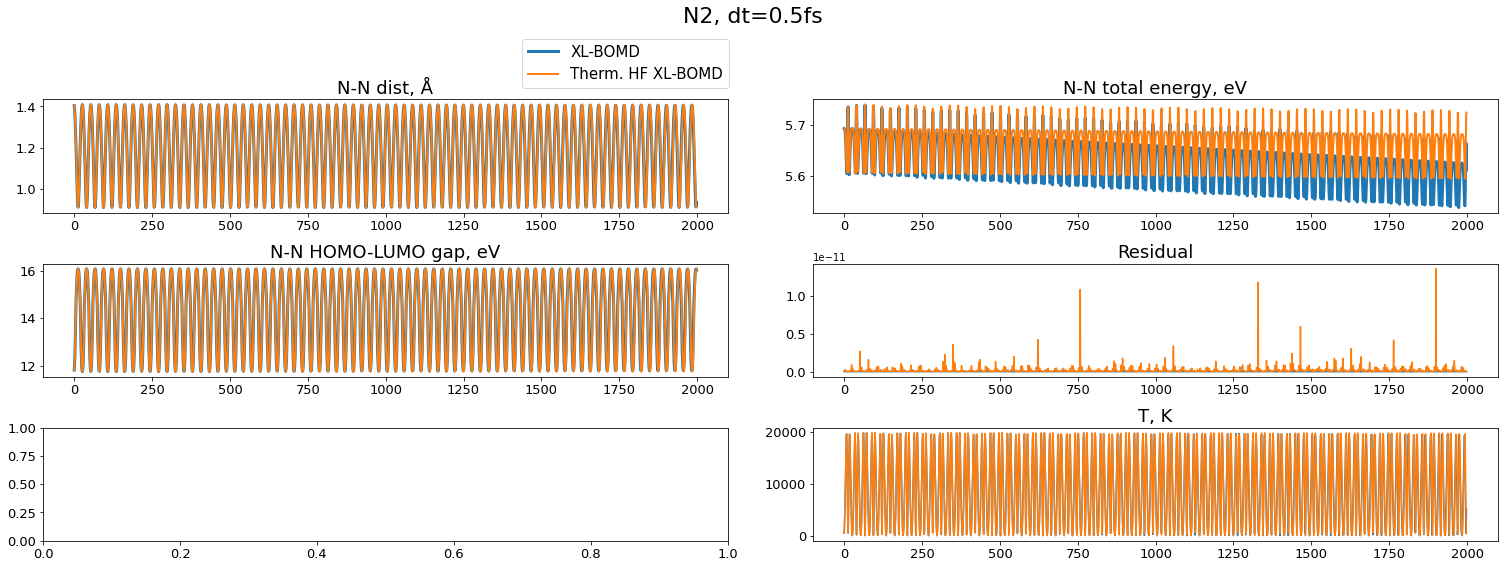

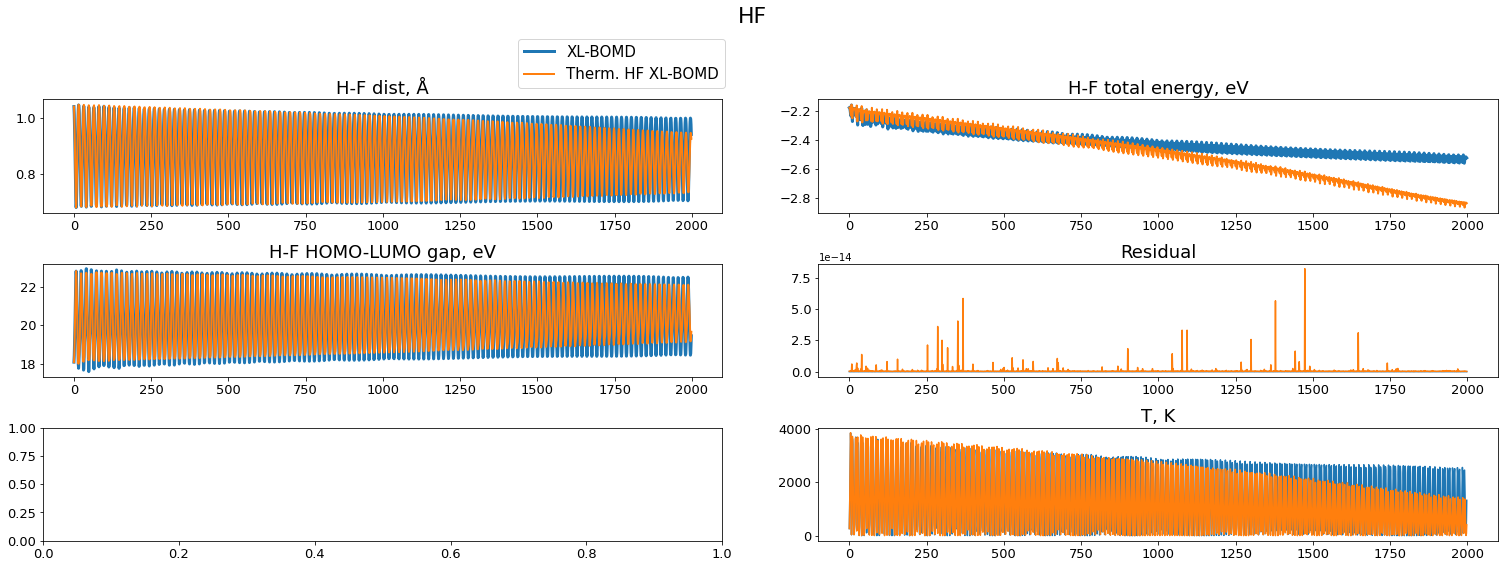

In [371]:
labels = [
        #'BOMD',
        'XL-BOMD',
        'Therm. HF XL-BOMD'
        ]

files = [
        #'2_aimd.0.xyz',
        '2_xl.0.xyz',
        '2_xl-lr-2.0.xyz'
        ]
my_plot(files, 'N2, dt=0.5fs', 'N-N', (0,1), labels, Range=[0,-1])

files = [
        #'2_aimd.1.xyz',
        '2_xl.1.xyz',
        '2_xl-lr.1.xyz'
        ]

my_plot(files, 'HF', 'H-F', (0,1), labels, Range=[0,-1])


2000
200
200
2000
200
200


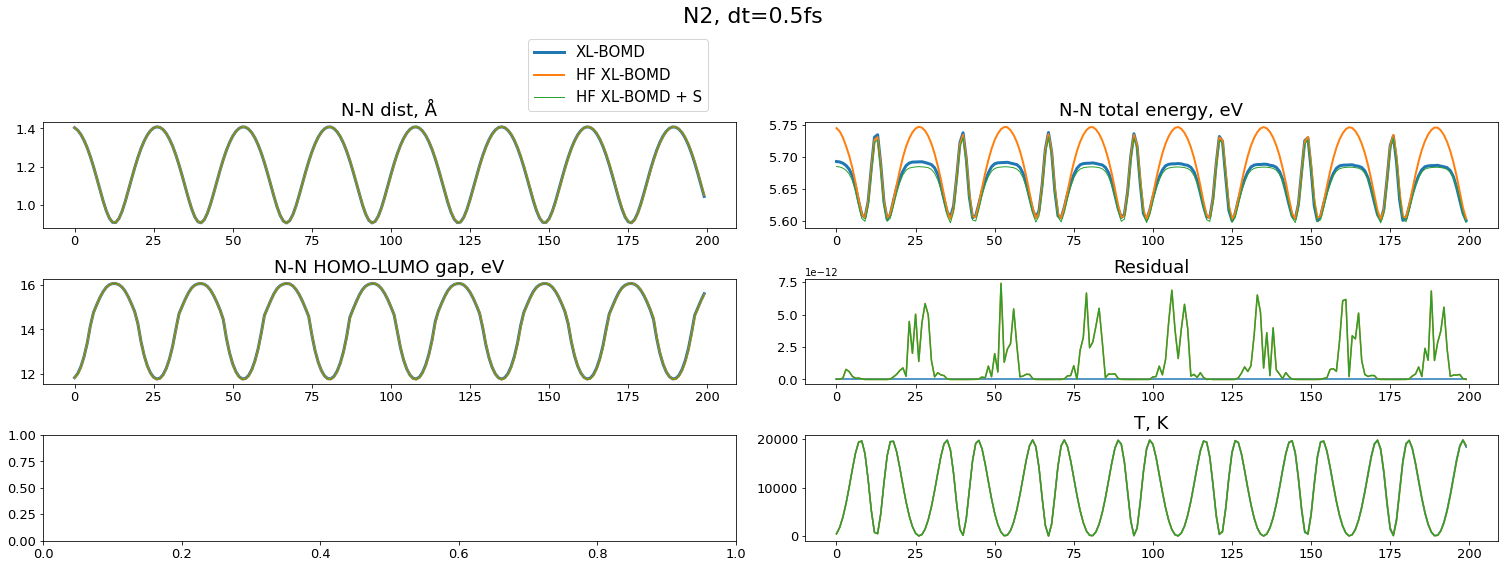

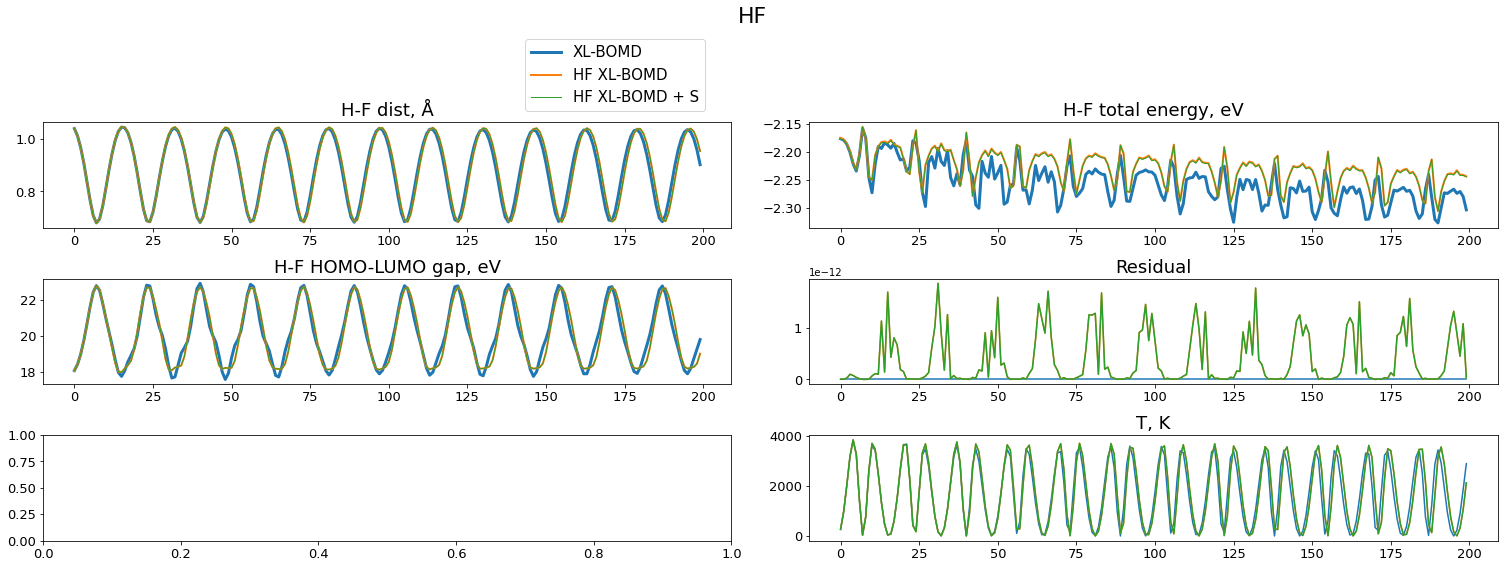

In [419]:
labels = [
        'XL-BOMD',
        'HF XL-BOMD',
        'HF XL-BOMD + S'
        ]

files = [
        '2_xl.0.xyz',
        'Test_1_xl-lr.0.xyz',
        'Test_2_xl-lr.0.xyz'
        ]
my_plot(files, 'N2, dt=0.5fs', 'N-N', (0,1), labels, Range=[0,200])

files = [
        '2_xl.1.xyz',
        'Test_1_xl-lr.1.xyz',
        'Test_2_xl-lr.1.xyz'
        ]

my_plot(files, 'HF', 'H-F', (0,1), labels, Range=[0,200])


# FOUR ATOMS

2000
2000
2000
2000
2000
2000


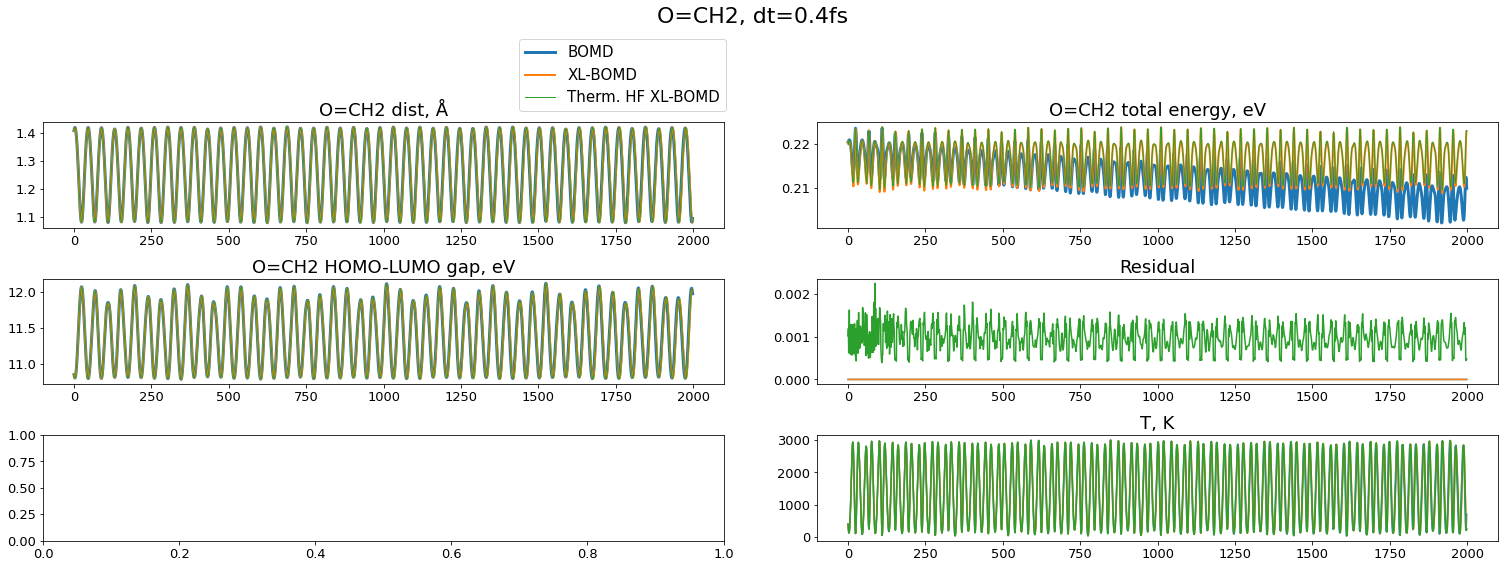

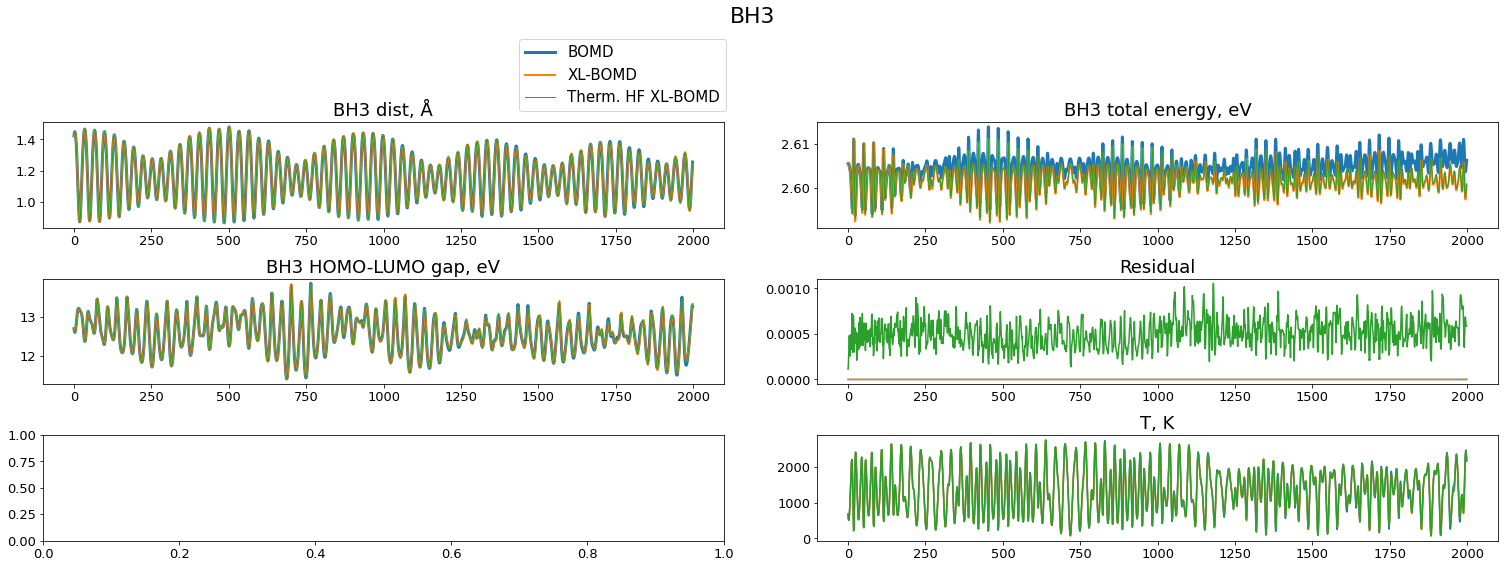

In [372]:
labels = [
        'BOMD',
        'XL-BOMD',
        'Therm. HF XL-BOMD'
        ]

files = [
        '4_aimd.0.xyz',
        '4_xl.0.xyz',
        '4_xl-lr-3.0.xyz'
        ]
my_plot(files, 'O=CH2, dt=0.4fs', 'O=CH2', (0,1), labels)

files = [
        '4_aimd.1.xyz',
        '4_xl.1.xyz',
        '4_xl-lr-3.1.xyz'
        ]
my_plot(files, 'BH3', 'BH3', (0,1), labels)


# BUTADIENE

In [144]:
mode30 = ase.io.read('but_xl.0.xyz', index=':')
view_x3d_n(mode30[-1], bond = 1.0, label = True, output = 'but.html')

3000
3000
3000


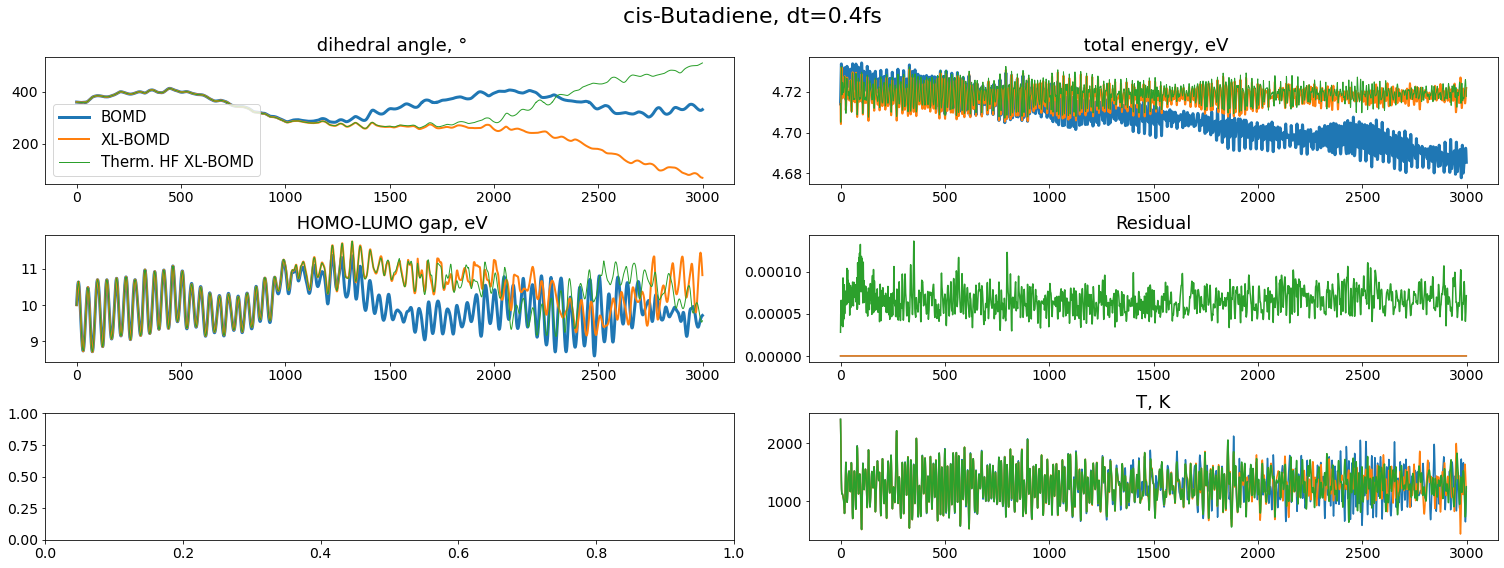

In [386]:
labels = ['BOMD', 'XL-BOMD', 'Therm. HF XL-BOMD']

files = [
        'but_aimd.0.xyz',
        'but_xl.0.xyz',
        'but_xl-lr.0.xyz'
        ]
my_plot_di(files, 'cis-Butadiene, dt=0.4fs', '',  (0,1,2,3), labels)


# CORONENE

In [10]:
mode30 = ase.io.read('cor_aimd.0.xyz', index=':')
view_x3d_n(mode30[0], bond = 1.0, label = True, output = 'C36.html')

1500
1500
1500


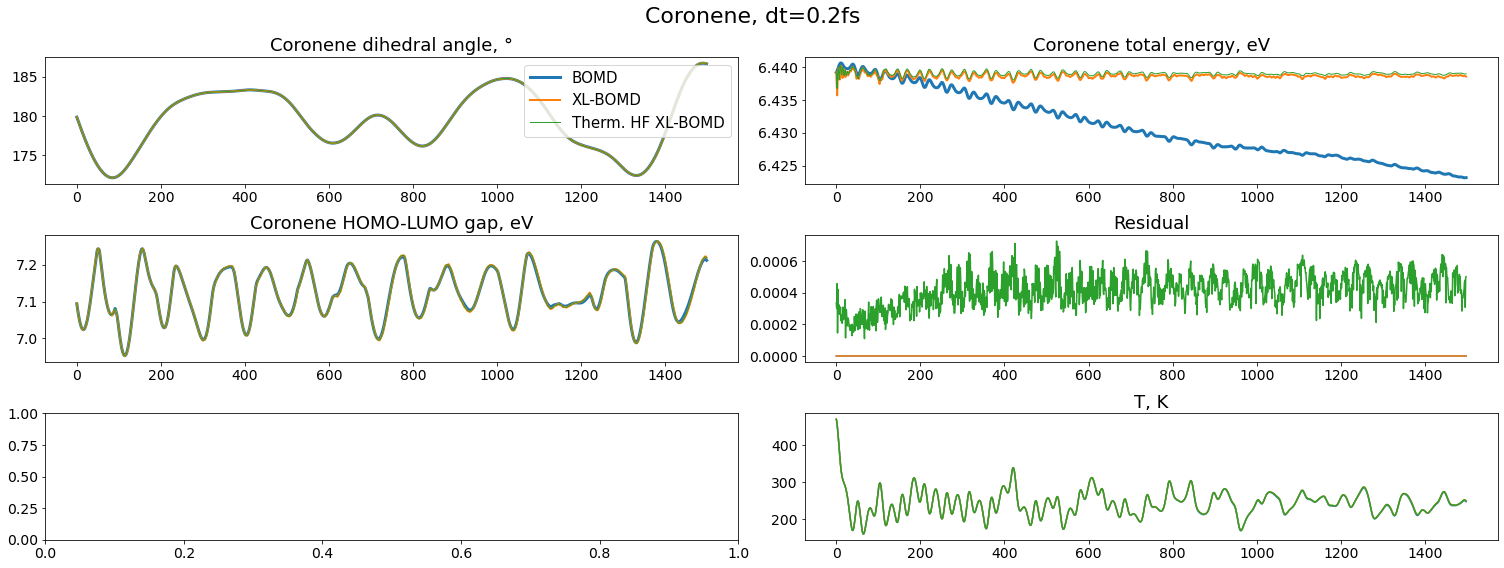

In [387]:
files = [
        'cor_aimd.0.xyz',
        'cor_xl.0.xyz',
        'cor_xl-lr.0.xyz'
        ]
labels = ['BOMD', 'XL-BOMD', 'Therm. HF XL-BOMD']

my_plot_di(files, 'Coronene, dt=0.2fs', 'Coronene', (1,14,10,20), labels)


# CORONENE - 2H

In [9]:

mode30 = ase.io.read('cor-2h-NR_aimd.0.xyz', index=':')


view_x3d_n(mode30[0], bond = 1.0, label = True, output = 'C36.html')

1800
1800


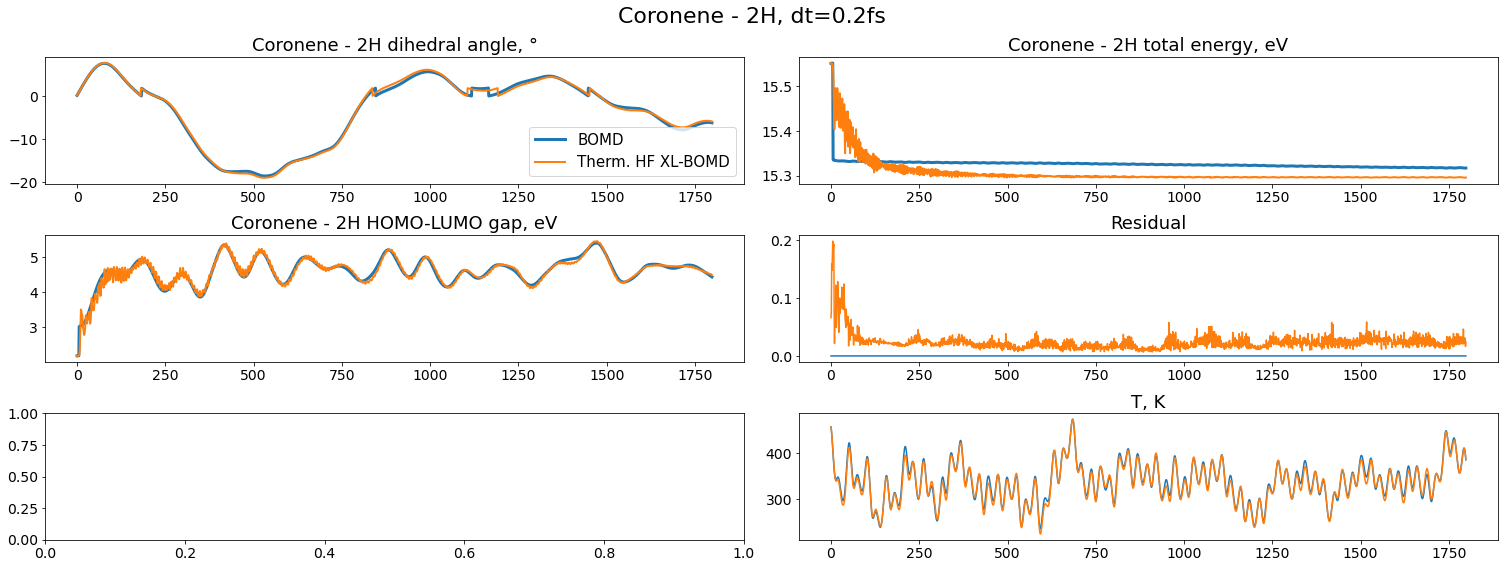

In [467]:
files = [
        'cor-2h_aimd.0.xyz',
        #'cor-2h_xl.0.xyz',
        'cor-2h_xl-lr-2.0.xyz'
        ]
labels = [
        'BOMD',
        #'XL-BOMD',
        'Therm. HF XL-BOMD'
        ]
my_plot_di(files, 'Coronene - 2H, dt=0.2fs', 'Coronene - 2H', (1,14,10,21), labels, [0,-1])

200
1500


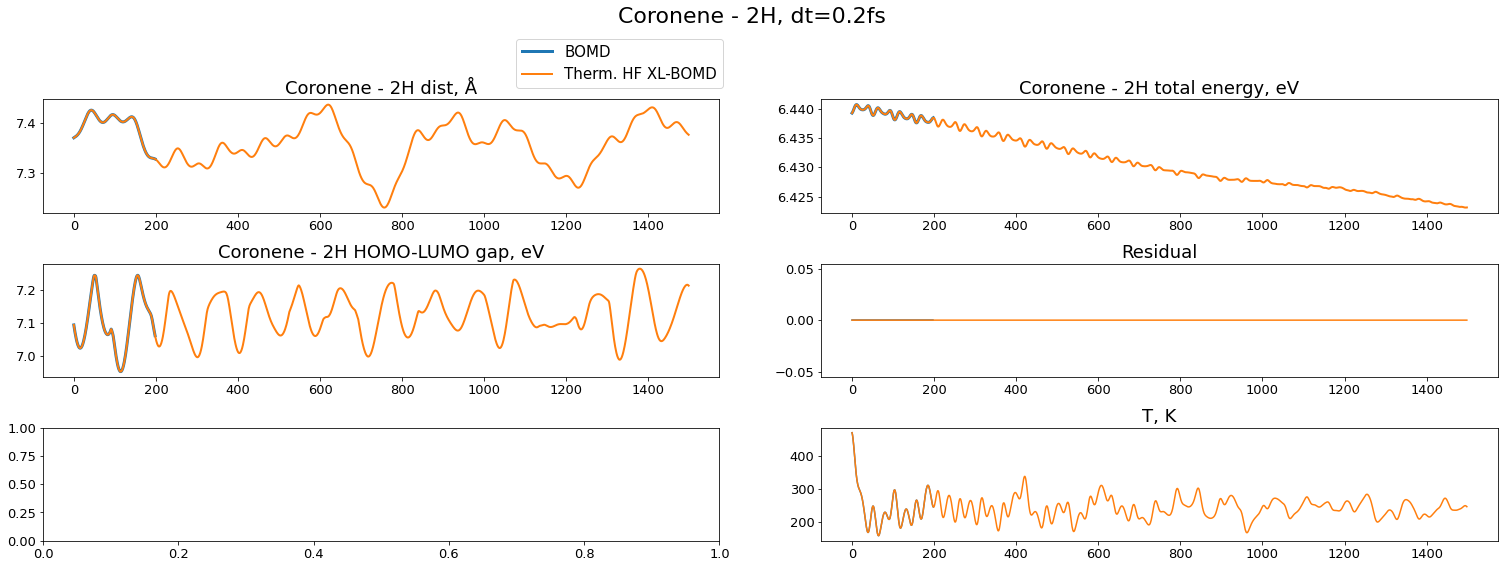

In [509]:
files = [
        'Test1_aimd.0.xyz',
        #'cor-2h_xl.0.xyz',
        'cor_aimd.0.xyz'
        ]
labels = [
        'BOMD',
        #'XL-BOMD',
        'Therm. HF XL-BOMD'
        ]
my_plot(files, 'Coronene - 2H, dt=0.2fs', 'Coronene - 2H', (1,0), labels, [0,-1])

# C36

In [8]:
mode30 = ase.io.read('C36_aimd.0.xyz', index=':')
view_x3d_n(mode30[1:3], bond = 1.0, label = True, output = 'C36.html')

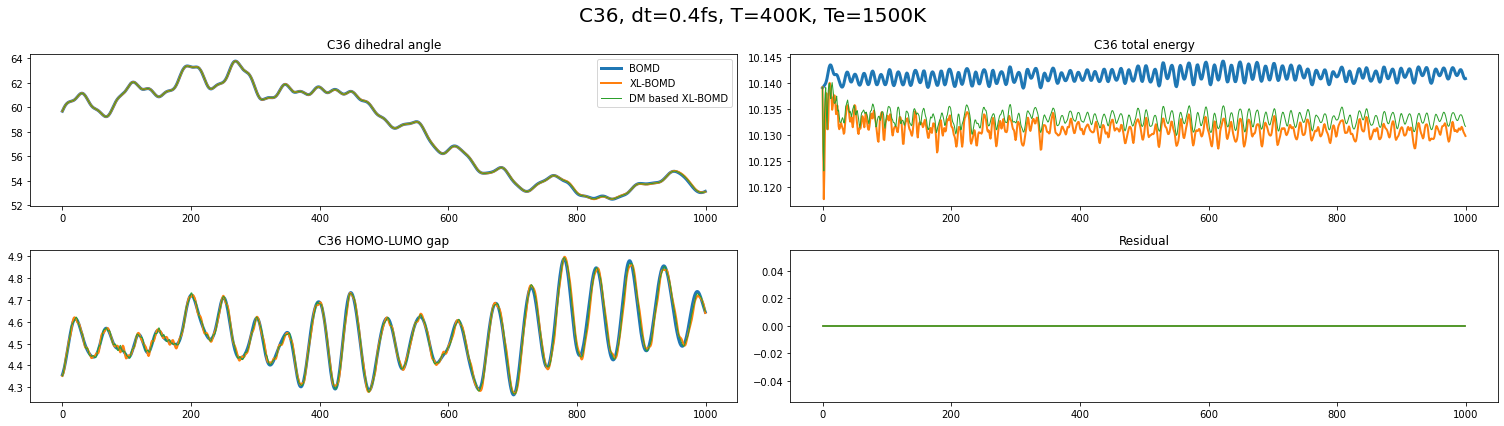

In [90]:
files = [
        'C36_aimd.0.xyz',
        'C36_xl.0.xyz',
        'C36_xl-lr.0.xyz'
        ]
labels = [
        'BOMD',
        'XL-BOMD',
        'DM based XL-BOMD'
        ]
my_plot_di(files, 'C36, dt=0.4fs, T=400K, Te=1500K', 'C36', (48,51,43,40), labels)

# C540

In [277]:
mode30 = ase.io.read('C540_aimd.0.xyz', index=':')

view_x3d_n(mode30[1:3], bond = 1.0, label = True, output = 'C540.html')

In [329]:
f = open('TEST_C540_xl-lr-2.0.xyz')
lines = f.readlines()
f.close()


In [330]:
lines[1]

'step: 1  T= 390.406K  Ek=  2.7250462906614786e+01  Ep=  1.7492551342588422e+02  E_gap=  3.6648651143025290e+00  Err=  0.0000000000000000e+00  t= 1669089039.48421\n'

In [331]:
lines[-541]

'step: 1000  T= 274.730K  Ek=  1.9176243308065530e+01  Ep=  1.8292583445277569e+02  E_gap=  4.0968410981712289e+00  Err=  0.0000000000000000e+00  t= 1669091147.21335\n'

1000
1000
1000


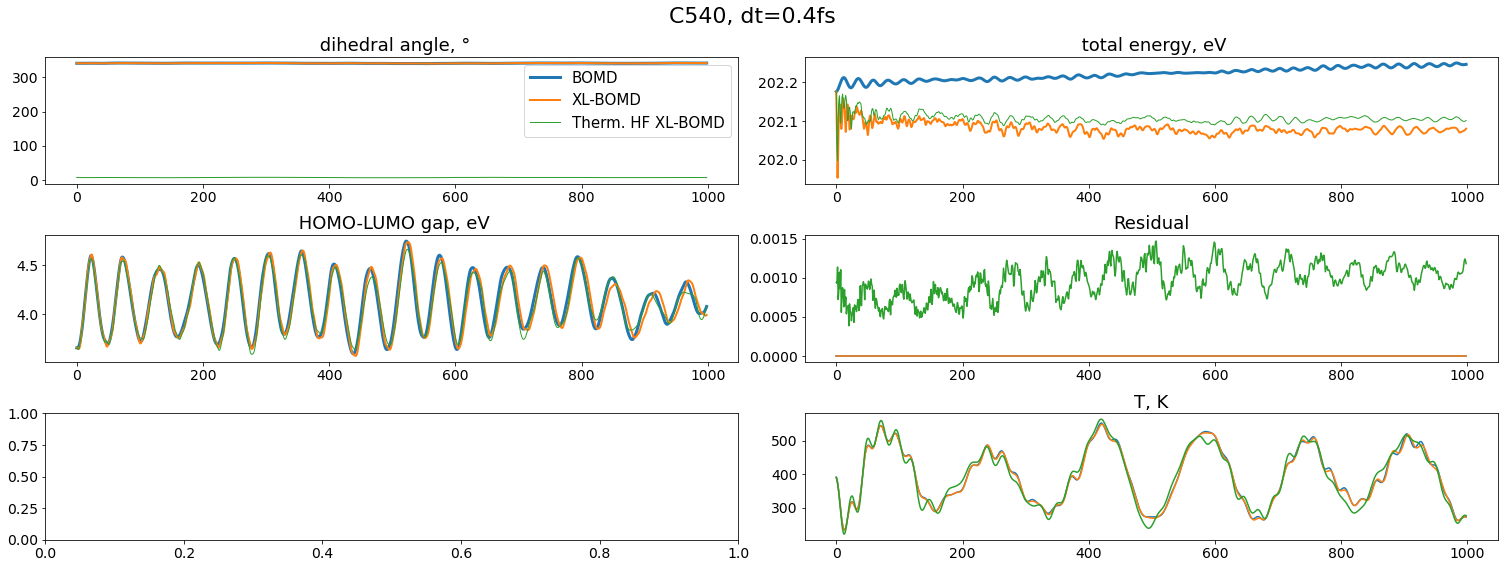

In [392]:
files = [
        'C540_aimd.0.xyz',
        'C540_xl.0.xyz',
        'C540_xl-lr.0.xyz'
        ]
labels = [
        'BOMD',
        'XL-BOMD',
        'Therm. HF XL-BOMD'
        ]
my_plot_di(files, 'C540, dt=0.4fs', '', (4,360,316,47), labels, [0,-1])

1000
1000
1000


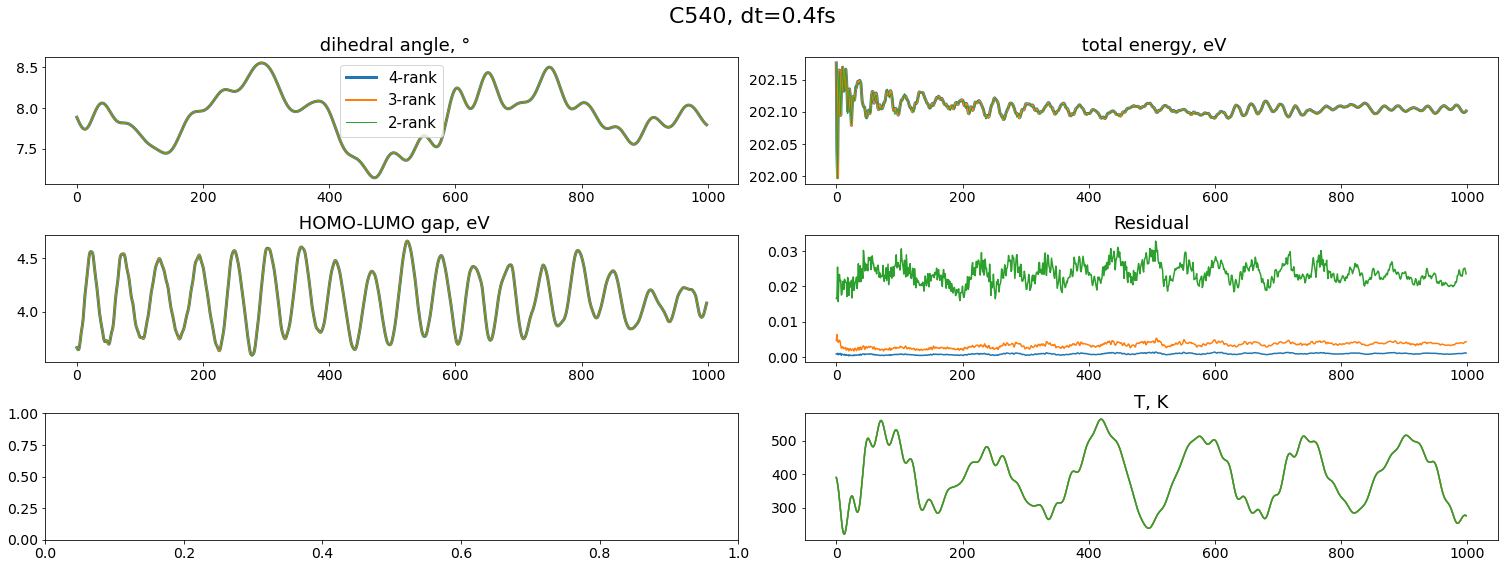

In [385]:
files = [
        'C540_xl-lr.0.xyz',
        'C540_xl-lr-3.0.xyz',
        'C540_xl-lr-2.0.xyz',
        ]
labels = [
        '4-rank',
        '3-rank',
        '2-rank'
        ]
my_plot_di(files, 'C540, dt=0.4fs', '', (4,360,316,47), labels, [0,-1])

# Diphenylacetylene

In [18]:
mode30 = ase.io.read('DiphAc_aimd.0.xyz', index=':')

view_x3d_n(mode30[1:3], bond = 1.0, label = True, output = 'DiphAc.html')

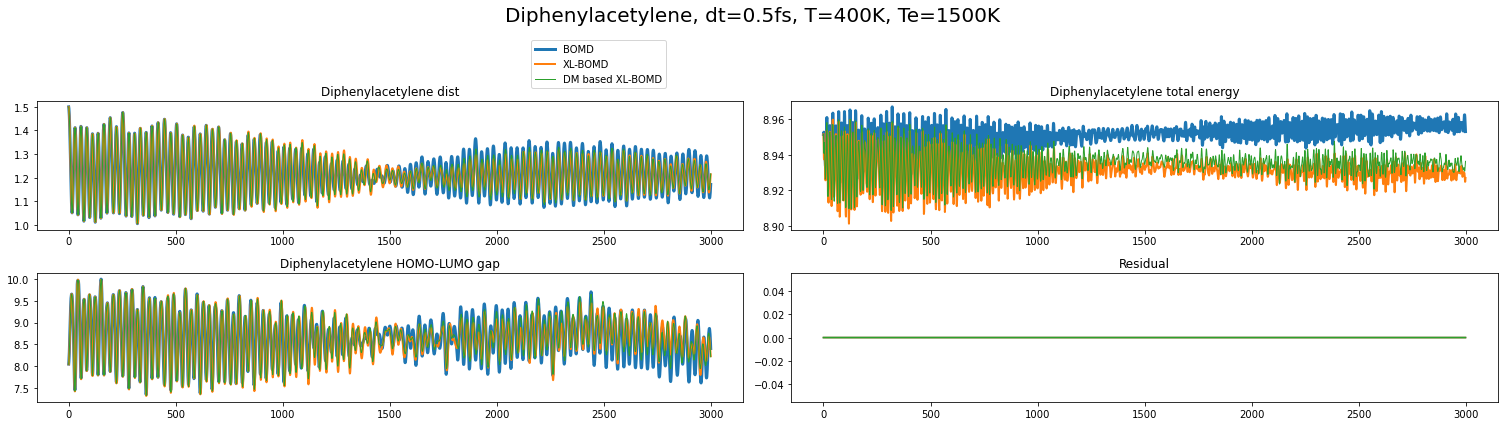

In [105]:
files = [
        'DiphAc_aimd.0.xyz',
        'DiphAc_xl.0.xyz',
        'DiphAc_xl-lr.0.xyz'
        ]
labels = [
        'BOMD',
        'XL-BOMD',
        'DM based XL-BOMD'
        ]
my_plot(files, 'Diphenylacetylene, dt=0.5fs, T=400K, Te=1500K', 'Diphenylacetylene', (12,13), labels, [0,-1])


# Dimethylacetylene

In [19]:
mode30 = ase.io.read('DimAc_aimd.0.xyz', index=':')

view_x3d_n(mode30[1:3], bond = 1.0, label = True, output = 'DimAc.html')

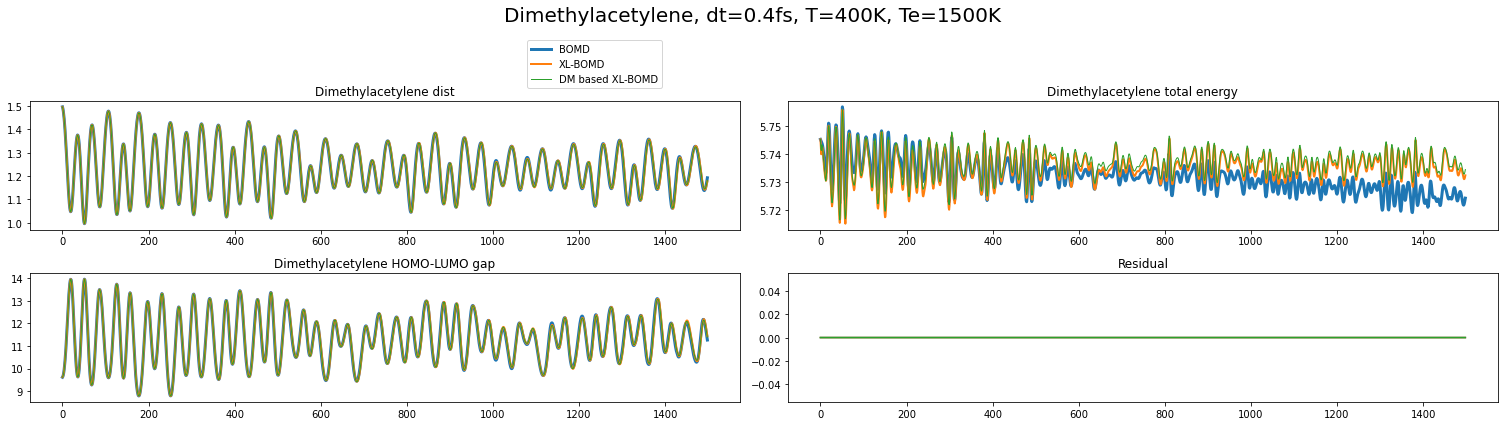

In [20]:
files = [
        'DimAc_aimd.0.xyz',
        'DimAc_xl.0.xyz',
        'DimAc_xl-lr.0.xyz'
        ]
labels = [
        'BOMD',
        'XL-BOMD',
        'DM based XL-BOMD'
        ]
my_plot(files, 'Dimethylacetylene, dt=0.4fs, T=400K, Te=1500K', 'Dimethylacetylene', (2,3), labels, [0,-1])

# Dimethyl acetylenedicarboxylate

In [30]:
mode30 = ase.io.read('DimAcOx_aimd.0.xyz', index=':')

view_x3d_n(mode30[1:3], bond = 1.0, label = True, output = 'DimAc.html')

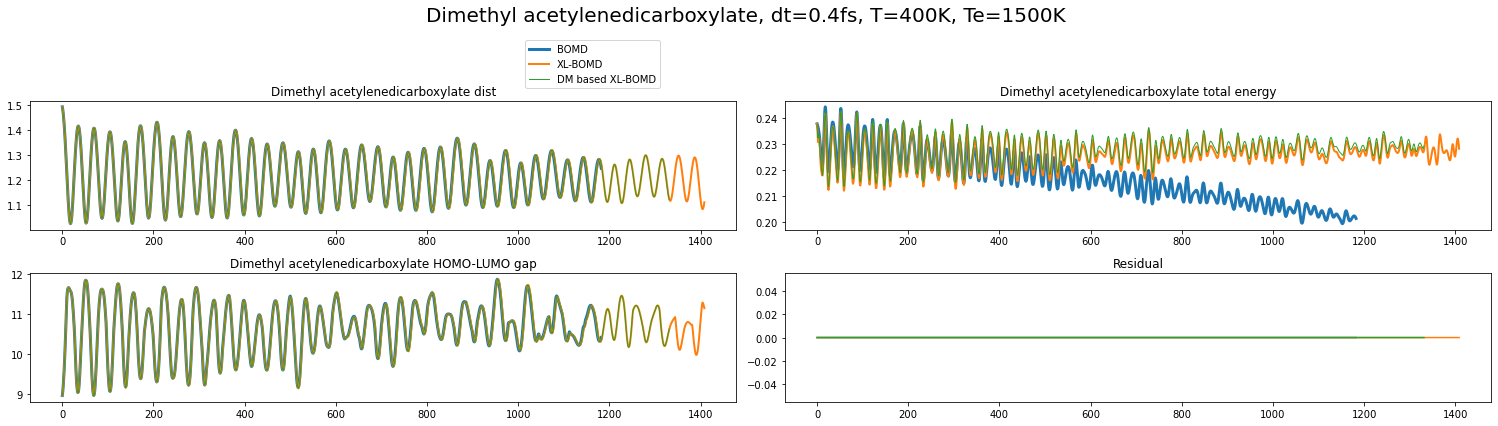

In [ ]:
files = [
        'DimAcOx_aimd.0.xyz',
        'DimAcOx_xl.0.xyz',
        'DimAcOx_xl-lr.0.xyz'
        ]
labels = [
        'BOMD',
        'XL-BOMD',
        'DM based XL-BOMD'
        ]
my_plot(files, 'Dimethyl acetylenedicarboxylate, dt=0.4fs, T=400K, Te=1500K', 'Dimethyl acetylenedicarboxylate', (8,9), labels, [0,-1])

# AcAc

In [ ]:
mode30 = ase.io.read('AcAc_xl-lr.0.xyz', index=':')

view(mode30)

In [ ]:
mode30 = ase.io.read('AcAc_aimd.0.xyz', index=':')

view_x3d_n(mode30[1:3], bond = 1.0, label = True, output = 'DimAc.html')

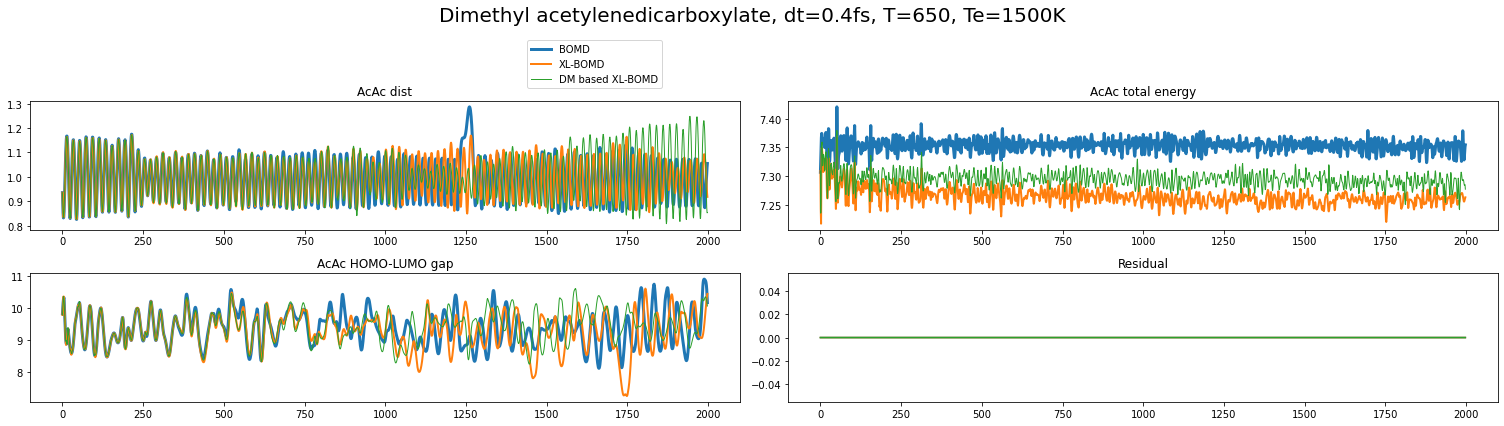

In [ ]:
files = [
        'AcAc_aimd.0.xyz',
        'AcAc_xl.0.xyz',
        'AcAc_xl-lr.0.xyz'
        ]
labels = [
        'BOMD',
        'XL-BOMD',
        'DM based XL-BOMD'
        ]
my_plot(files, 'Dimethyl acetylenedicarboxylate, dt=0.4fs, T=650, Te=1500K', 'AcAc', (1,13), labels, [0,-1])

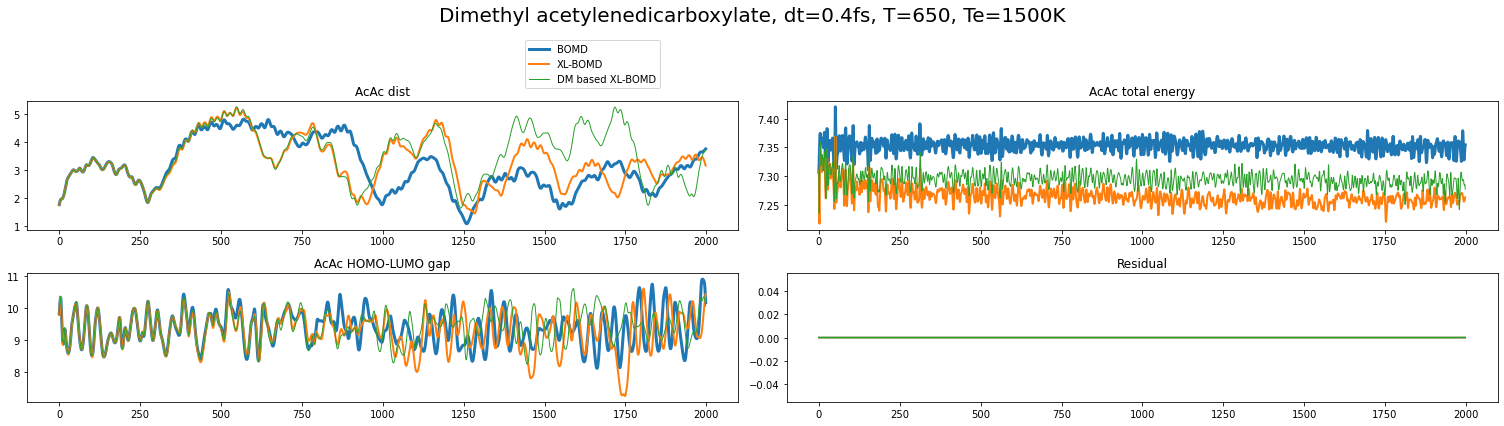

In [ ]:
files = [
        'AcAc_aimd.0.xyz',
        'AcAc_xl.0.xyz',
        'AcAc_xl-lr.0.xyz'
        ]
labels = [
        'BOMD',
        'XL-BOMD',
        'DM based XL-BOMD'
        ]
my_plot(files, 'Dimethyl acetylenedicarboxylate, dt=0.4fs, T=650, Te=1500K', 'AcAc', (0,13), labels, [0,-1])

In [3]:
mode30 = ase.io.read('cor_opt_aimd_bas.0.xyz', index=':')

view3 = nv.show_ase(mode30[0], gui=True)
view3.add_unitcell()
#view3.add_representation('spacefill', selection='#C', color='blue', radius='1.2')

print(mode30[0].get_distance(0,4))
view3

2.4407795843317395


NGLWidget()

# Methanol

372267


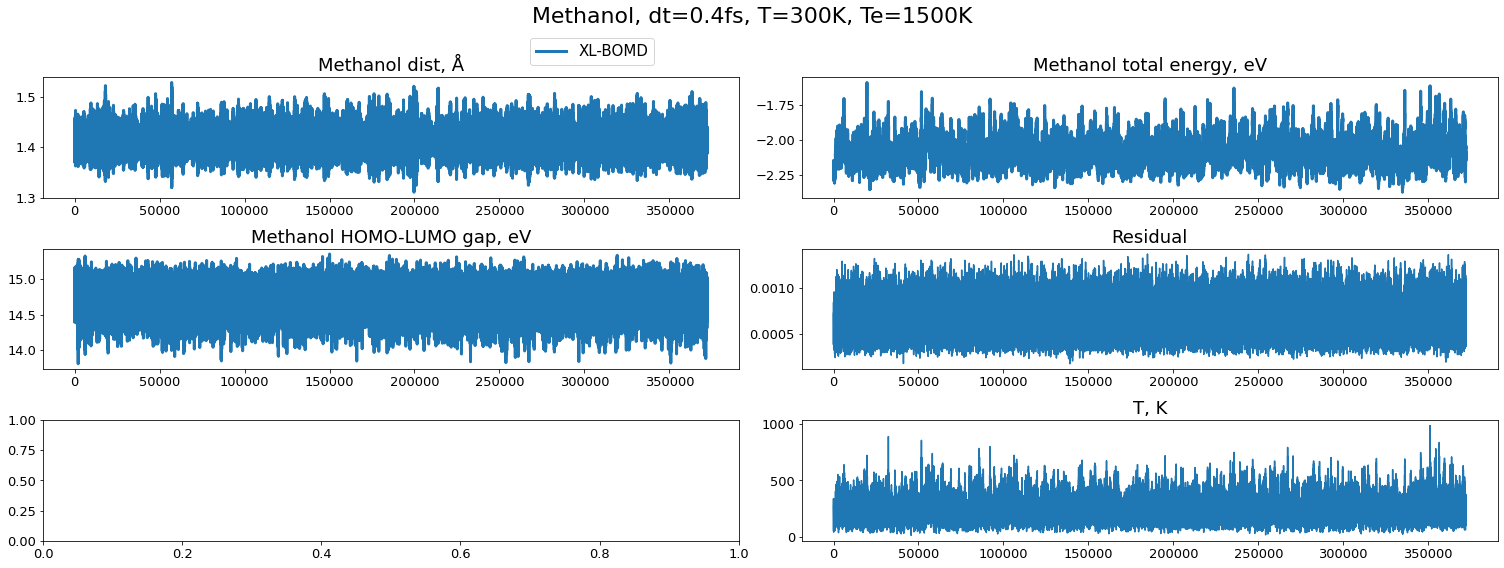

In [27]:
files = [
        #'BOMD.0.xyz',
        #'XL-LR.0.xyz',
        #'XL-LR_batch_com.4.xyz'
        #'BOMD_NOcom_01.0.xyz',
        #'LANG_NOcom_01.0.xyz',

        #'XL-LR_com_01.0.xyz',

        #'XL-LR_NOcom_T_01.0.xyz',
        #'XL-LR_NOcom_01.0.xyz',

        #'XL-LR_batch_NOcom_01.9.xyz',
        #'XL-LR_NOcom_DAMP_04.0.xyz',
        'XL-LR_com_DAMP_04.0.xyz',




        ]
labels = [
        #'BOMD',
        'XL-BOMD',
        'Therm HF XL-BOMD'
        ]
my_plot(files, 'Methanol, dt=0.4fs, T=300K, Te=1500K', 'Methanol', (0,1), labels, [0,-1])

# Malonaldehyde

In [68]:
mode30 = ase.io.read('XL-LR_com_01.0.xyz', index=':')

view(mode30)

In [67]:
mode30 = ase.io.read('XL-LR_com_01.0.xyz', index=':')

view_x3d_n(mode30[0], bond = 1.0, label = True, output = 'DimAc.html')

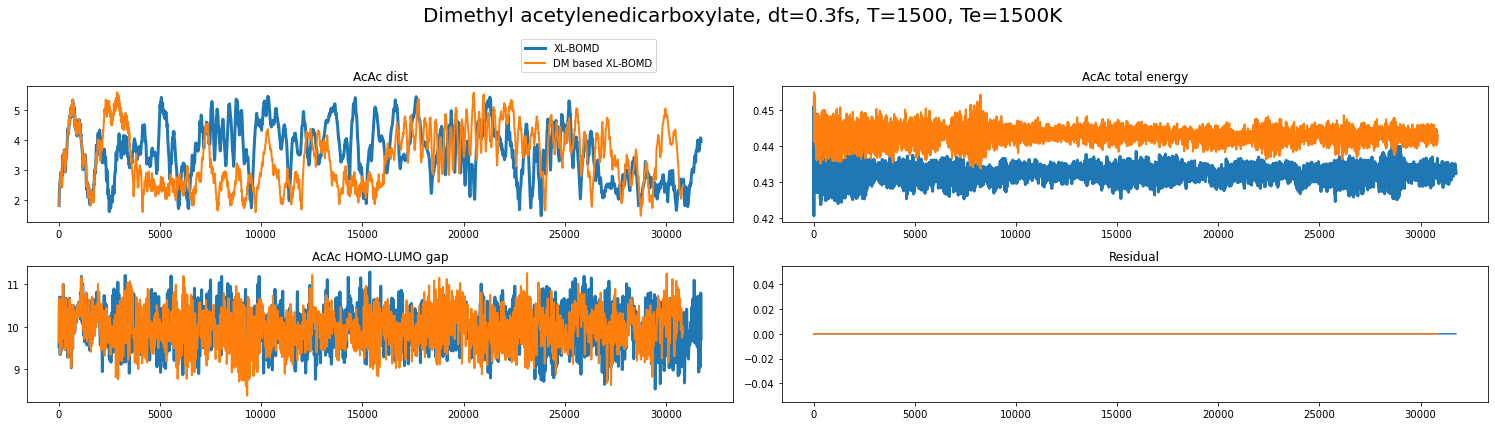

In [207]:
files = [
        #'MalAl_aimd.0.xyz',
        'MalAl_xl.0.xyz',
        'MalAl_xl-lr.0.xyz'
        ]
labels = [
        #'BOMD',
        'XL-BOMD',
        'DM based XL-BOMD'
        ]
my_plot(files, 'Dimethyl acetylenedicarboxylate, dt=0.3fs, T=1500, Te=1500K', 'AcAc', (1,8), labels, [10,-1])

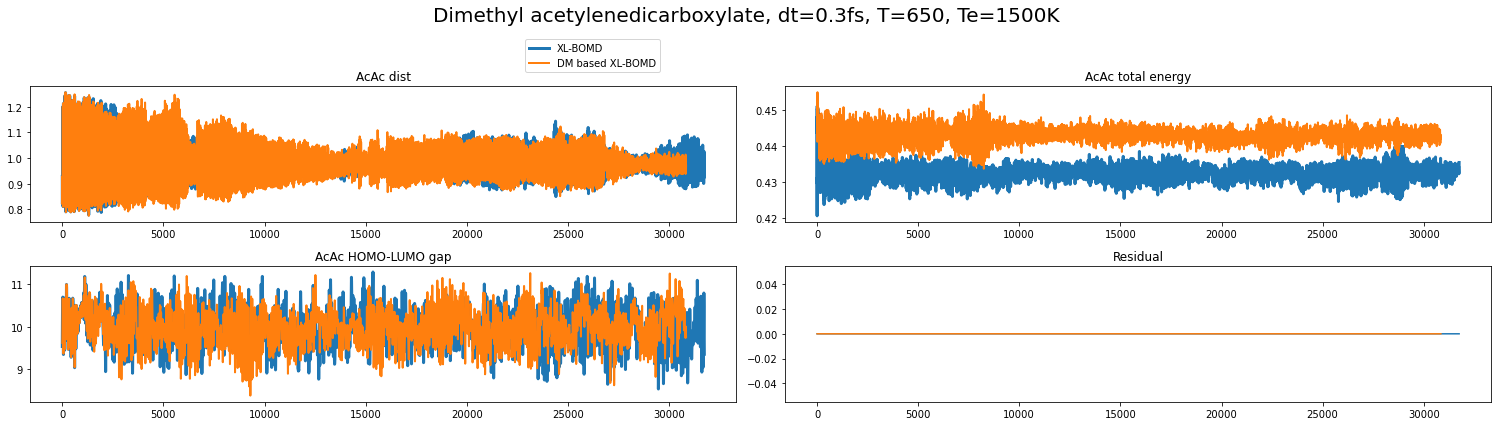

In [208]:
files = [
        #'MalAl_aimd.0.xyz',
        'MalAl_xl.0.xyz',
        'MalAl_xl-lr.0.xyz'
        ]
labels = [
       # 'BOMD',
        'XL-BOMD',
        'DM based XL-BOMD'
        ]
my_plot(files, 'Dimethyl acetylenedicarboxylate, dt=0.3fs, T=650, Te=1500K', 'AcAc', (0,8), labels, [10,-1])

# Sherical Pot Test

In [421]:
mode30 = ase.io.read('Test_2_xl-lr.0.xyz', index=':')

In [422]:
view(mode30[-1])

130636


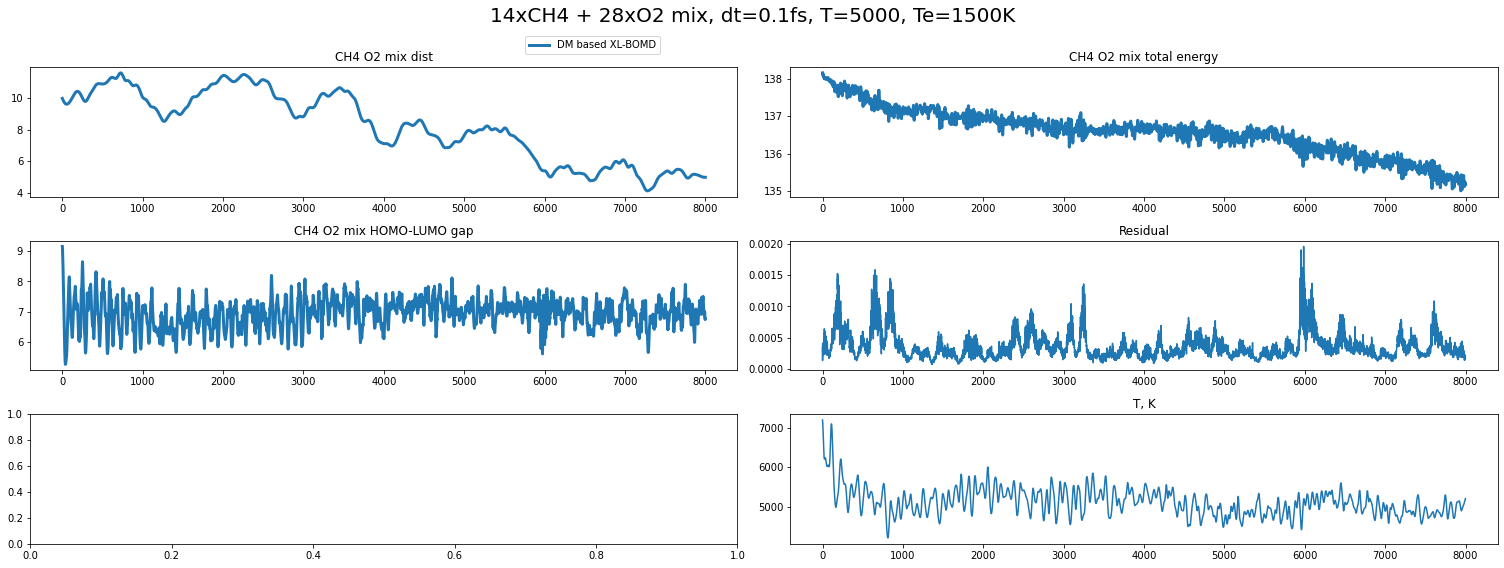

In [817]:
files = [
        #'MethComb/MethComb_bomd.0.xyz',
        #'MethComb/MethComb_xl.0.xyz',
        'MethComb/Explode_MethComb_xl-lr.0.xyz',
        ]

labels = [
        #'BOMD',
        #'XL-BOMD',
        'DM based XL-BOMD'
        ]
my_plot(files, '14xCH4 + 28xO2 mix, dt=0.1fs, T=5000, Te=1500K', 'CH4 O2 mix', (15,84), labels, [0,8000])

115283


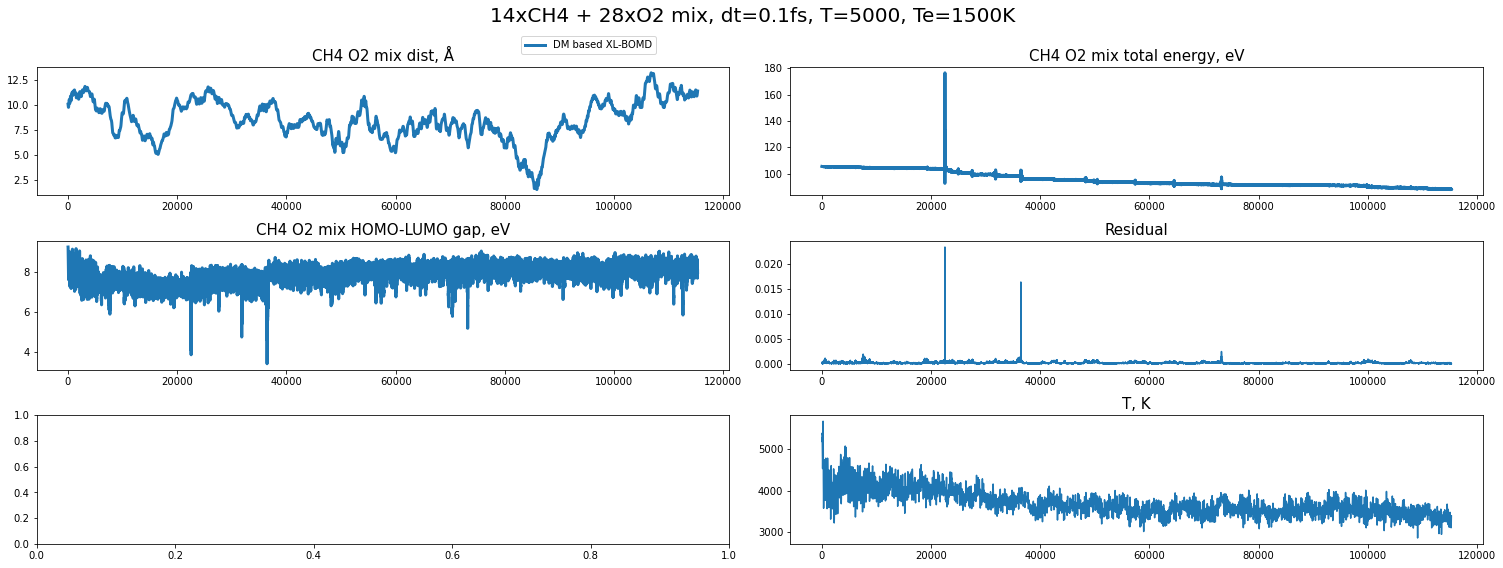

In [28]:
files = [
        #'MethComb/MethComb_bomd.0.xyz',
        #'MethComb/MethComb_xl.0.xyz',
        'MethComb/MethComb_xl-lr.0.xyz',
        ]

labels = [
        #'BOMD',
        #'XL-BOMD',
        'DM based XL-BOMD'
        ]
my_plot(files, '14xCH4 + 28xO2 mix, dt=0.1fs, T=5000, Te=1500K', 'CH4 O2 mix', (15,84), labels, [0,-1])

In [835]:
mode30 = ase.io.read('MethComb/MethComb_xl-lr.0.xyz', index=':')


In [836]:
mode30[-1].write("MethComb/MethComb_TRAJ.xyz")

In [763]:
#mode30 = ase.io.read('MethComb_xl-lr.0.xyz', index=':')

view_x3d_n(mode30[-1], bond = 1.0, label = True, output = 'DimAc.html')

In [764]:
view(mode30)

In [301]:
#mode30[1012].write("MethComb_big-rel.xyz")